# 단어의 표현 (Word Representation)
기계는 문자를 그대로 인식할 수 없기 때문에 숫자로 변환


# 1 TF-IDF를 활용한 단어 벡터

## 1-1 직접 구현하기
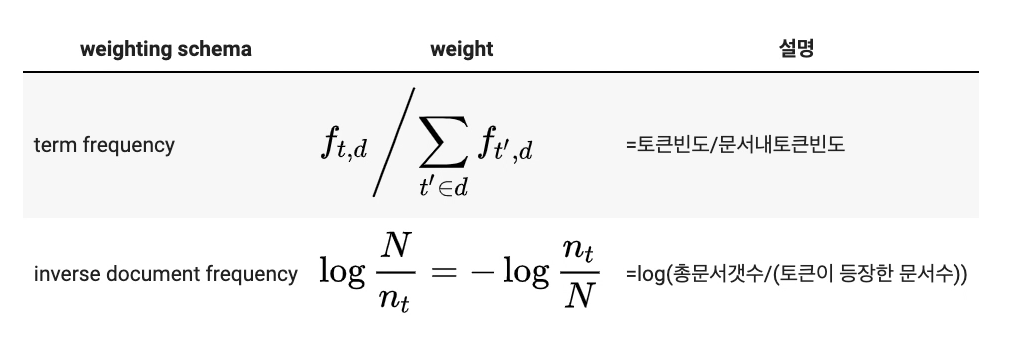

In [1]:
d1 = "The cat sat on my face I hate a cat"
d2 = "The dog sat on my bed I lobe a dog"

In [6]:
import numpy as np

def tf(t, d):
  return d.count(t) / len(d) # t가 d문서에 등장한 횟수 / d문서의 토큰 수

def idf(t, D):
  N = len(D) # 총 문서의 갯수
  n = len([True for d in D if t in d]) # 총 문서에서 t가 등장한 문서 수
  return np.log(N/n)

def tfidf(t, d, D):
  return tf(t, d) * idf(t, D)

def tokenizer(d):
  return d.split() # 토큰은 공백으로 구분하는 방식으로 사용

def tfidf_scorer(D): # 문서 집합을 인자로 넣으면 각 단어별로 tfidf score를 구해서 return하는 함수
  docs = [tokenizer(d) for d in D] # 전체 문서에서 각 문서를 tokenizer를 사용하여 토큰화
  result = []

  for d in docs:
    result.append([(t, tfidf(t, d, docs)) for t in d])

  return result

In [7]:
tfidf_scorer([d1, d2])

[[('The', 0.0),
  ('cat', 0.13862943611198905),
  ('sat', 0.0),
  ('on', 0.0),
  ('my', 0.0),
  ('face', 0.06931471805599453),
  ('I', 0.0),
  ('hate', 0.06931471805599453),
  ('a', 0.0),
  ('cat', 0.13862943611198905)],
 [('The', 0.0),
  ('dog', 0.13862943611198905),
  ('sat', 0.0),
  ('on', 0.0),
  ('my', 0.0),
  ('bed', 0.06931471805599453),
  ('I', 0.0),
  ('lobe', 0.06931471805599453),
  ('a', 0.0),
  ('dog', 0.13862943611198905)]]

## 1-2 sklearn 활용

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

docs = [d1, d2]
count_vect = CountVectorizer()
countv = count_vect.fit_transform(docs)

print(countv.toarray())
print(count_vect.vocabulary_)

[[0 2 0 1 1 0 1 1 1 1]
 [1 0 2 0 0 1 1 1 1 1]]
{'the': 9, 'cat': 1, 'sat': 8, 'on': 7, 'my': 6, 'face': 3, 'hate': 4, 'dog': 2, 'bed': 0, 'lobe': 5}


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
tfidfv = tfidf_vect.fit_transform(docs)

print(tfidfv.toarray())
print(tfidf_vect.vocabulary_)

[[0.         0.70600557 0.         0.35300279 0.35300279 0.
  0.25116439 0.25116439 0.25116439 0.25116439]
 [0.35300279 0.         0.70600557 0.         0.         0.35300279
  0.25116439 0.25116439 0.25116439 0.25116439]]
{'the': 9, 'cat': 1, 'sat': 8, 'on': 7, 'my': 6, 'face': 3, 'hate': 4, 'dog': 2, 'bed': 0, 'lobe': 5}


## 1-3 gensim 활용

In [32]:
from gensim.models import TfidfModel
from gensim import corpora

doc_ls = [d.split() for d in docs]
id2word = corpora.Dictionary(doc_ls)
bow = [id2word.doc2bow(d) for d in doc_ls]

tfidf = TfidfModel(bow)
tfidf[bow[0]] # 결과값은 (단어의 인덱스 (n) , 결과값) -> n번째 단어가 무엇인지 확인하려면 id2word[n]을 통해 알 수 있음

[(3, 0.8164965809277261), (4, 0.4082482904638631), (5, 0.4082482904638631)]

In [31]:
id2word[3]

'cat'